In [12]:
# Generate comprehensive dataset statistics
print("="*60)
print("COMPREHENSIVE EDA REPORT - CTD Gene-Disease Associations")
print("="*60)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total samples: {len(df):,}")
print(f"   • Positive associations: {(df['label'] == 1).sum():,}")
print(f"   • Negative associations: {(df['label'] == 0).sum():,}")
print(f"   • Unique genes: {df['GeneSymbol'].nunique():,}")
print(f"   • Unique diseases: {df['DiseaseName'].nunique():,}")

print(f"\n📏 TEXT LENGTH ANALYSIS:")
stats = df['sentence_length'].describe()
print(f"   • Average length: {stats['mean']:.1f} characters")
print(f"   • Median length: {stats['50%']:.0f} characters")
print(f"   • Range: {stats['min']:.0f} - {stats['max']:.0f} characters")
print(f"   • Standard deviation: {stats['std']:.1f}")

print(f"\n🔬 EVIDENCE ANALYSIS (Positive associations only):")
pos_stats = pos_df['pmid_count'].describe()
print(f"   • Average PMIDs per association: {pos_stats['mean']:.2f}")
print(f"   • Median PMIDs per association: {pos_stats['50%']:.0f}")
print(f"   • Maximum PMIDs for single association: {pos_stats['max']:.0f}")
print(f"   • Associations with multiple PMIDs: {(pos_df['pmid_count'] > 1).sum():,}")

print(f"\n🧬 TOP 10 MOST FREQUENT GENES:")
top_genes = df['GeneSymbol'].value_counts().head(10)
for i, (gene, count) in enumerate(top_genes.items(), 1):
    print(f"   {i:2d}. {gene}: {count} associations")

print(f"\n🦠 TOP 10 MOST FREQUENT DISEASES:")
top_diseases = df['DiseaseName'].value_counts().head(10)
for i, (disease, count) in enumerate(top_diseases.items(), 1):
    disease_short = disease[:50] + "..." if len(disease) > 50 else disease
    print(f"   {i:2d}. {disease_short}: {count} associations")

print("\n" + "="*60)

COMPREHENSIVE EDA REPORT - CTD Gene-Disease Associations

📊 DATASET OVERVIEW:
   • Total samples: 68,444
   • Positive associations: 34,222
   • Negative associations: 34,222
   • Unique genes: 9,111
   • Unique diseases: 5,858

📏 TEXT LENGTH ANALYSIS:
   • Average length: 52.0 characters
   • Median length: 49 characters
   • Range: 26 - 168 characters
   • Standard deviation: 15.4

🔬 EVIDENCE ANALYSIS (Positive associations only):
   • Average PMIDs per association: 1.09
   • Median PMIDs per association: 1
   • Maximum PMIDs for single association: 84
   • Associations with multiple PMIDs: 3,605

🧬 TOP 10 MOST FREQUENT GENES:
    1. TNF: 197 associations
    2. SOD2: 132 associations
    3. IL6: 132 associations
    4. IL1B: 114 associations
    5. PTGS2: 109 associations
    6. POMC: 98 associations
    7. TGFB1: 98 associations
    8. TP53: 96 associations
    9. IFNG: 88 associations
   10. AGT: 87 associations

🦠 TOP 10 MOST FREQUENT DISEASES:
    1. Liver Cirrhosis, Experimenta

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set some plotting styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the main dataset
try:
    df = pd.read_csv("data/processed/gd_pairs.csv")
    print("Dataset loaded successfully!")
    print(f"Shape of the dataset: {df.shape}")
except FileNotFoundError:
    print("Error: 'data/processed/gd_pairs.csv' not found. Make sure you've run the data prep script.")

# Display the first few rows to see what we're working with
df.head()

Dataset loaded successfully!
Shape of the dataset: (68444, 5)


,GeneSymbol,DiseaseName,text,PubMedIDs,label
0,SLC52A3,Esophageal Squamous Cell Carcinoma,SLC52A3 is associated with Esophageal Squamous...,20729853,1
1,PPP2R2C,Hypersensitivity,PPP2R2C is associated with Hypersensitivity,NaN,0
2,SOCS2,"Dermatitis, Allergic Contact","SOCS2 is associated with Dermatitis, Allergic ...",16033404,1
3,IKZF2,Precursor Cell Lymphoblastic Leukemia-Lymphoma,IKZF2 is associated with Precursor Cell Lympho...,23334668,1
4,SARM1,Cerebellar Diseases,SARM1 is associated with Cerebellar Diseases,NaN,0


Label Distribution:
label
1    34222
0    34222
Name: count, dtype: int64


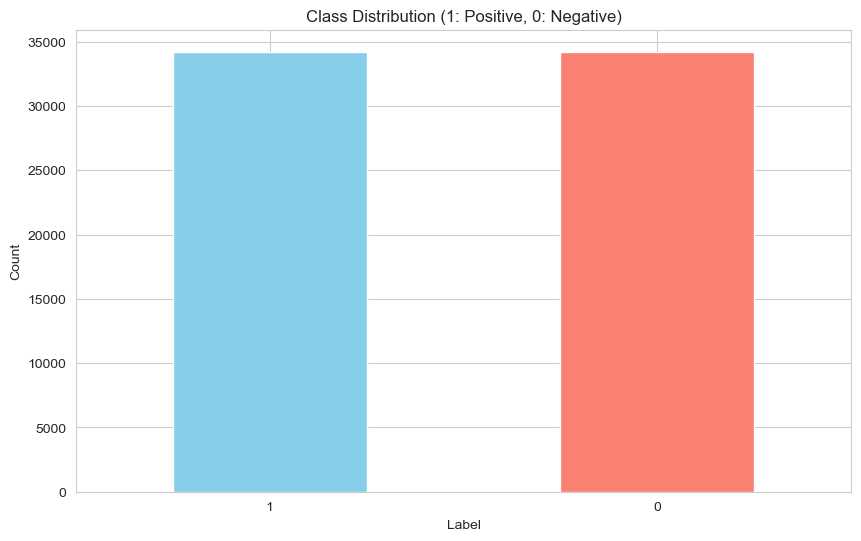

In [8]:
# Check the distribution of labels
label_counts = df['label'].value_counts()
print("Label Distribution:")
print(label_counts)

# Visualize the distribution
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (1: Positive, 0: Negative)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

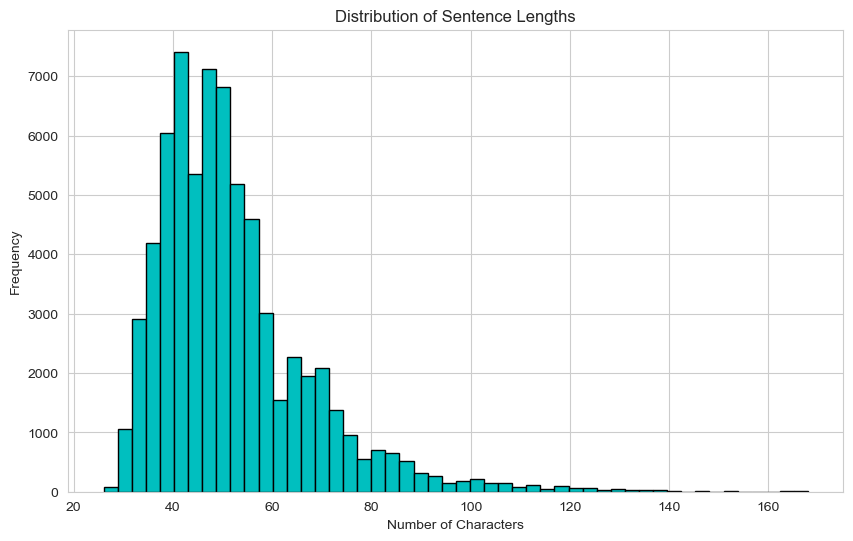


Sentence Length Statistics:
count    68444.000000
mean        51.970633
std         15.427931
min         26.000000
25%         42.000000
50%         49.000000
75%         58.000000
max        168.000000
Name: sentence_length, dtype: float64


In [7]:
# Calculate sentence lengths
df['sentence_length'] = df['text'].str.len()

# Plot the distribution
plt.hist(df['sentence_length'], bins=50, color='c', edgecolor='k')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

# Get summary statistics
print("\nSentence Length Statistics:")
print(df['sentence_length'].describe())

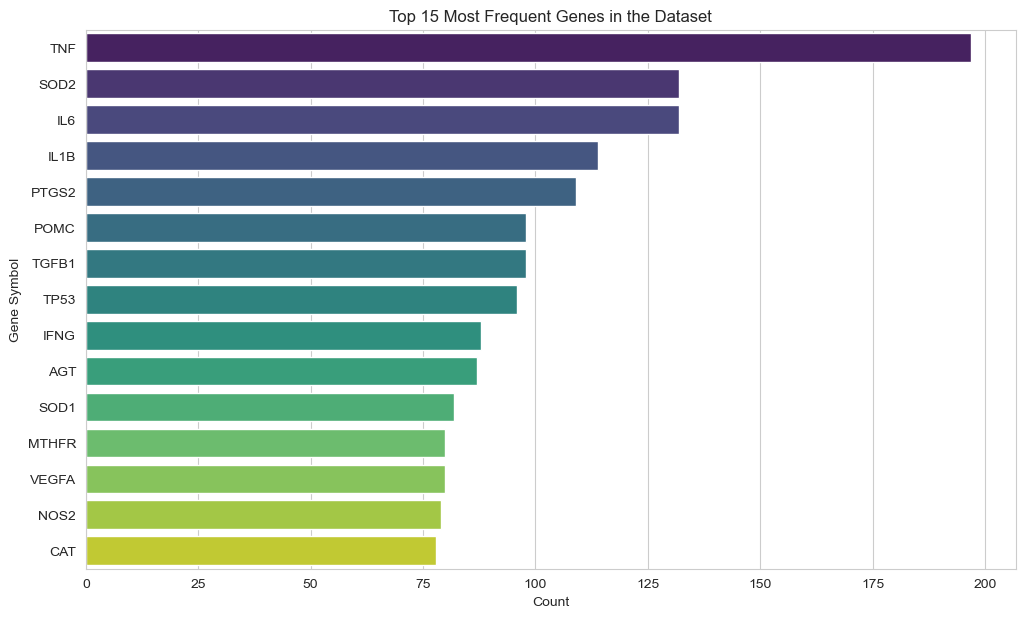

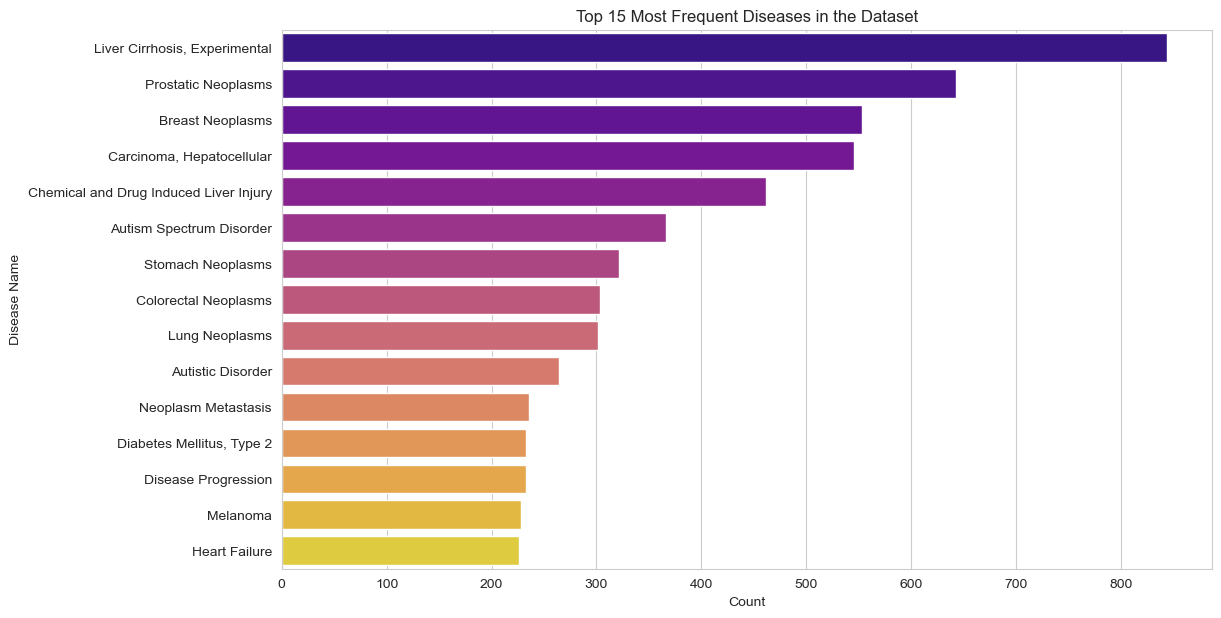

In [11]:
# Top 15 most common genes
top_genes = df['GeneSymbol'].value_counts().head(15)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_genes.values, y=top_genes.index, palette='viridis')
plt.title('Top 15 Most Frequent Genes in the Dataset')
plt.xlabel('Count')
plt.ylabel('Gene Symbol')
plt.show()

# Top 15 most common diseases
top_diseases = df['DiseaseName'].value_counts().head(15)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_diseases.values, y=top_diseases.index, palette='plasma')
plt.title('Top 15 Most Frequent Diseases in the Dataset')
plt.xlabel('Count')
plt.ylabel('Disease Name')
plt.show()

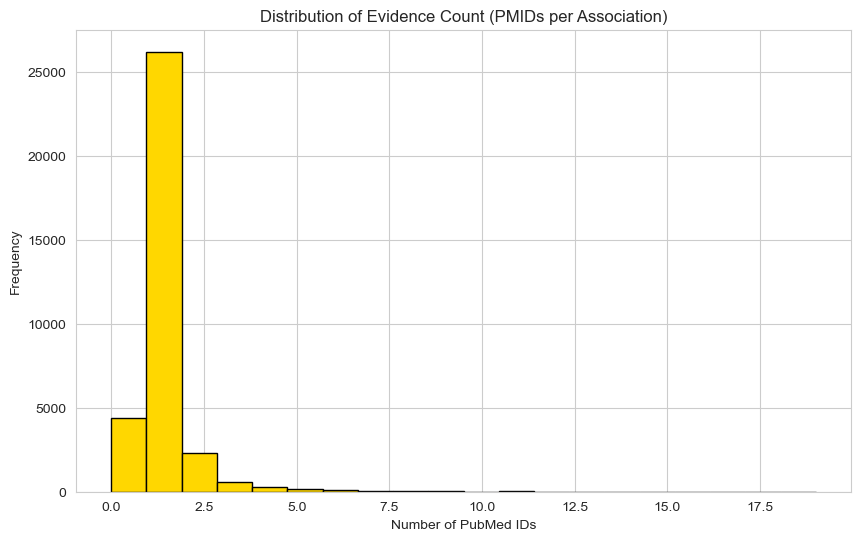


Statistics for PubMed ID Counts per Association:
count    34222.000000
mean         1.092397
std          1.388164
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         84.000000
Name: pmid_count, dtype: float64


In [10]:
# We only care about positive examples with evidence
pos_df = df[df['label'] == 1].copy()

# Count the number of PubMed IDs. They are often separated by '|'.
# A single entry has 0 separators, so we add 1.
pos_df['pmid_count'] = pos_df['PubMedIDs'].str.count('\|') + 1

# Handle cases with no PMID (fill with 0)
pos_df['pmid_count'] = pos_df['pmid_count'].fillna(0)

# Plot the distribution
plt.hist(pos_df[pos_df['pmid_count'] < 20]['pmid_count'], bins=20, color='gold', edgecolor='k') # Zoom in on lower counts
plt.title('Distribution of Evidence Count (PMIDs per Association)')
plt.xlabel('Number of PubMed IDs')
plt.ylabel('Frequency')
plt.show()

print("\nStatistics for PubMed ID Counts per Association:")
print(pos_df['pmid_count'].describe())